In [22]:
library(repr)
library(tidyverse)
library(tidymodels)

In [23]:
spotify_data <- read_csv("data/spotify_scraped_final.csv") |>
                select(-explicit, id)
# Split data (training 75% test 25%)
spotify_split <- initial_split(spotify_data, prop = 0.25, strata = playlist_genre)  
spotify_train <- training(spotify_split)   
spotify_test <- testing(spotify_split)
# Cross-Validation
# spotify_vfold <- vfold_cv(training_set, v = 5, strata = y)

spotify_train

Rows: 32850 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): artists, id, name, playlist_genre, playlist_subgenre
dbl (15): duration_ms, popularity, track_number, danceability, energy, key, ...
lgl  (1): explicit

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


artists,duration_ms,id,name,popularity,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_genre,playlist_subgenre
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
"Charli XCX, EDX",200443,5scxjvcdozadBoRRN0UMaM,White Mercedes - EDX's Miami Sunset Remix,30,1,0.846,0.773,5,-3.503,1,0.0473,0.014100,2.23e-05,0.2040,0.586,124.008,4,edm,electro house
"Kygo, Whitney Houston",228267,6oJ6le65B3SEqPwMRNXWjY,Higher Love,76,1,0.693,0.678,8,-7.159,1,0.0324,0.015100,5.71e-06,0.1010,0.404,103.952,4,edm,electro house
"Armin van Buuren, Ne-Yo",150160,2tilX6FUl0IwFgiOYjuc6V,Unlove You,32,1,0.678,0.928,3,-3.660,0,0.0597,0.030300,3.33e-05,0.1430,0.663,116.892,4,edm,electro house
"Billie Eilish, Justin Bieber",194839,3yNZ5r3LKfdmjoS3gkhUCT,bad guy (with Justin Bieber),67,1,0.670,0.453,0,-11.265,1,0.2950,0.252000,3.30e-01,0.1170,0.680,135.055,4,edm,electro house
"Ava Max, Keanu Silva",177465,478QYNLw6dhTTx4oEkhBeq,Freaking Me Out - Keanu Silva Remix,0,1,0.755,0.931,1,-4.104,0,0.0606,0.132000,2.71e-02,0.0854,0.288,122.041,4,edm,electro house
"Estelle, Kanye West, Brooks",200624,6B2NRQjtSOtqi67d72r5cx,American Boy - Brooks Remix,0,1,0.609,0.764,5,-4.564,0,0.1110,0.099400,0.00e+00,0.1970,0.531,128.082,4,edm,electro house
"Maroon 5, Dillon Francis",162600,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,53,1,0.726,0.815,11,-4.969,1,0.0373,0.072400,4.21e-03,0.3570,0.693,99.972,4,edm,electro house
"The Chainsmokers, Bebe Rexha, Keanu Silva",169093,75FpbthrwQmzHlBJLuGdC7,Call You Mine (feat. Bebe Rexha) - Keanu Silva Remix,42,2,0.718,0.930,7,-3.777,1,0.1010,0.028700,8.29e-06,0.2040,0.280,121.956,4,edm,electro house
"Ellie Goulding, Juice WRLD, R3HAB",203733,3iJeF2izF1QcpCgUc97BLl,Hate Me - R3HAB Remix,48,1,0.437,0.774,8,-4.918,1,0.0554,0.148000,0.00e+00,0.1330,0.329,123.125,4,edm,electro house


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


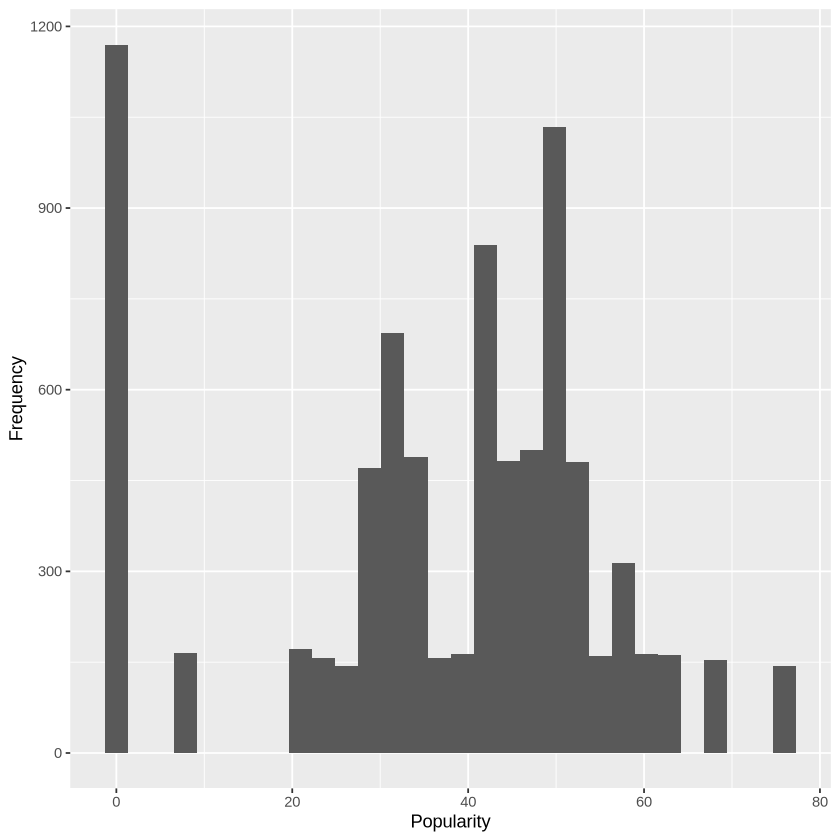

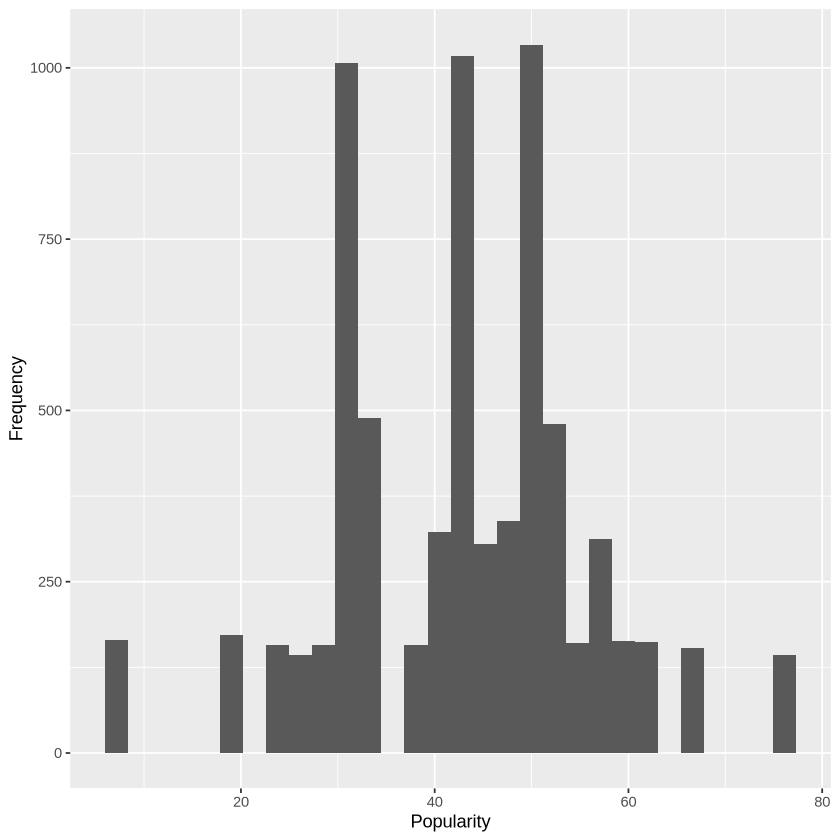

In [12]:
popularity_plot <- spotify_train |>
    ggplot(aes(x = popularity)) +
      geom_histogram() +
      xlab("Popularity") +
      ylab("Frequency") 

popularity_plot

popularity_plot2 <- spotify_train |>
    filter(popularity > 0) |>
    ggplot(aes(x = popularity)) +
      geom_histogram() +
      xlab("Popularity") +
      ylab("Frequency") 

popularity_plot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 7 rows containing non-finite values (`stat_bin()`).”


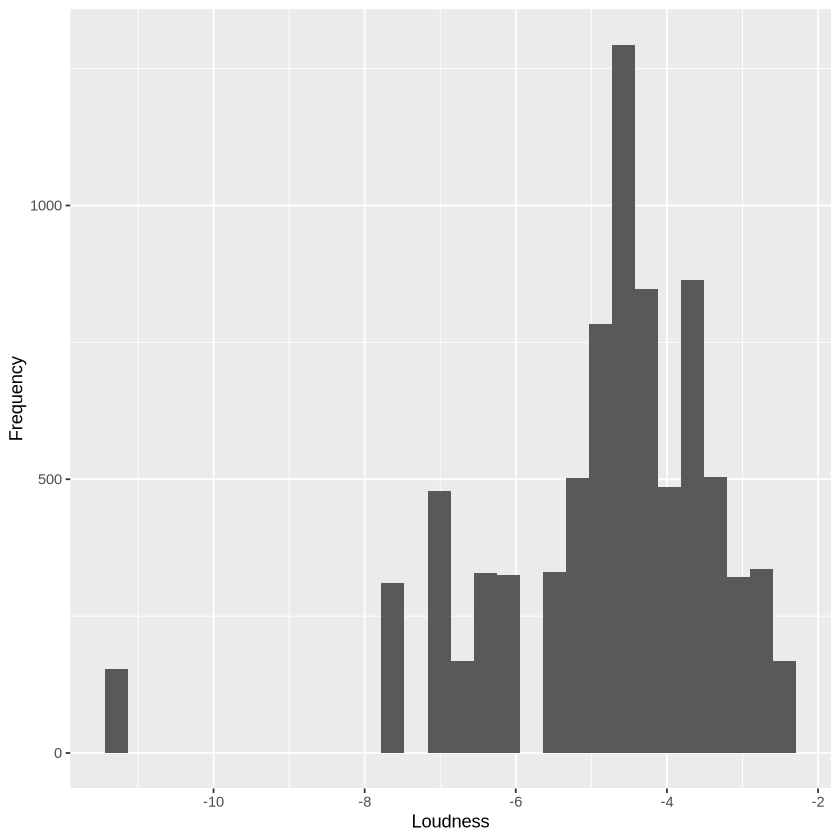

In [13]:
loudness_plot <- spotify_train |>
    ggplot(aes(x = loudness)) +
      geom_histogram() +
      xlab("Loudness") +
      ylab("Frequency") 

loudness_plot


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 7 rows containing non-finite values (`stat_bin()`).”


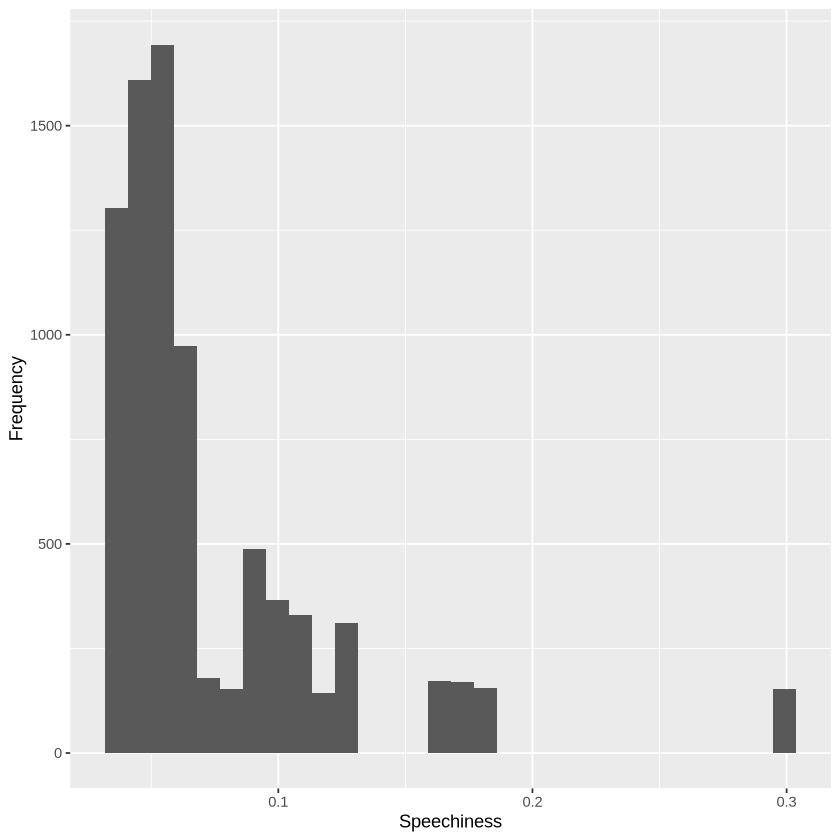

In [14]:
speechiness_plot <- spotify_train |>
    ggplot(aes(x = speechiness)) +
      geom_histogram() +
      xlab("Speechiness") +
      ylab("Frequency") 

speechiness_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 7 rows containing non-finite values (`stat_bin()`).”


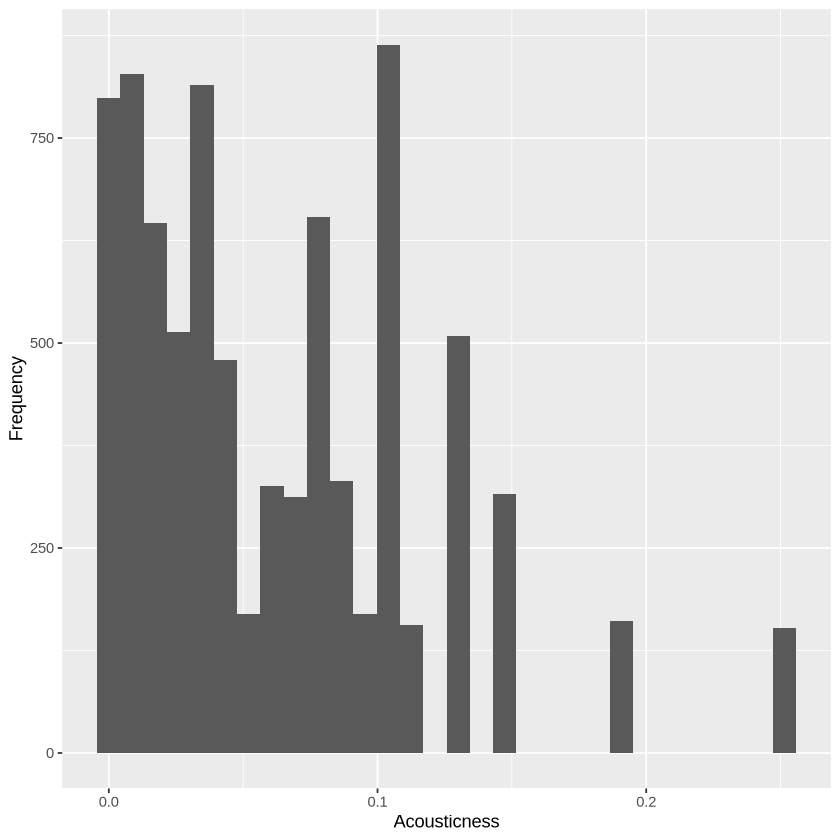

In [15]:
acousticness_plot <- spotify_train |>
    ggplot(aes(x = acousticness)) +
      geom_histogram() +
      xlab("Acousticness") +
      ylab("Frequency") 

acousticness_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 7 rows containing non-finite values (`stat_bin()`).”


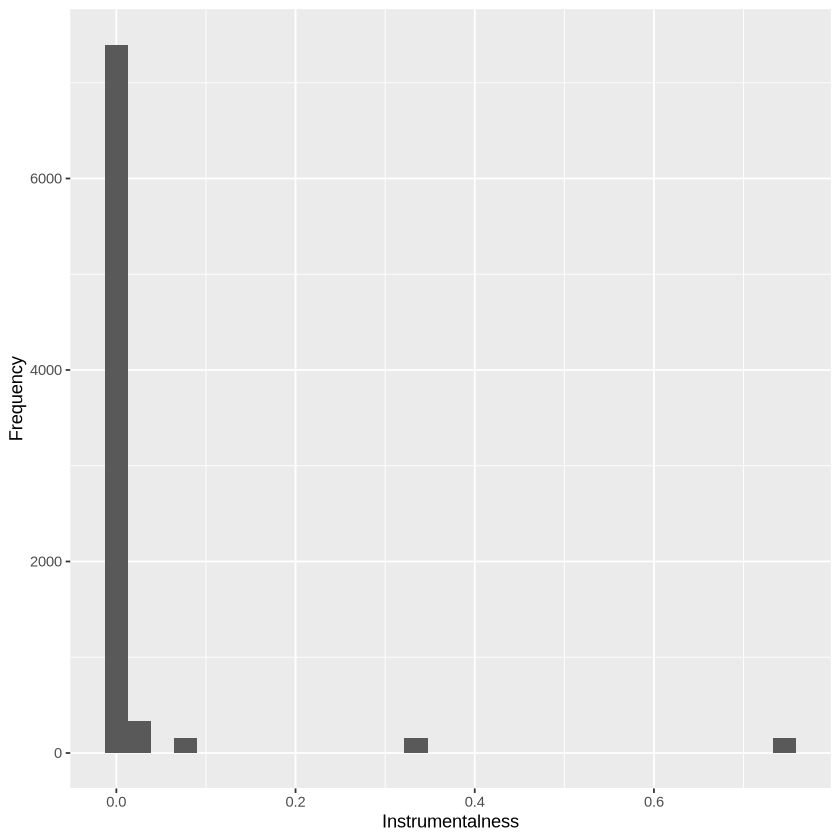

In [16]:
instrumentalness_plot <- spotify_train |>
    ggplot(aes(x = instrumentalness)) +
      geom_histogram() +
      xlab("Instrumentalness") +
      ylab("Frequency") 

instrumentalness_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 7 rows containing non-finite values (`stat_bin()`).”


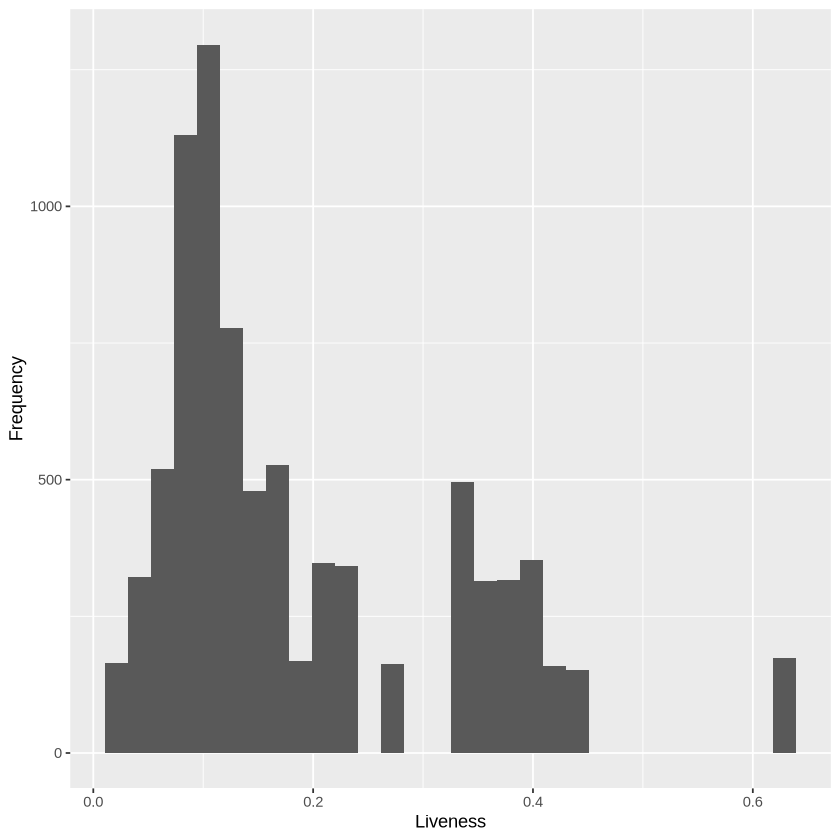

In [17]:
liveness_plot <- spotify_train |>
    ggplot(aes(x = liveness)) +
      geom_histogram() +
      xlab("Liveness") +
      ylab("Frequency") 

liveness_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 7 rows containing non-finite values (`stat_bin()`).”


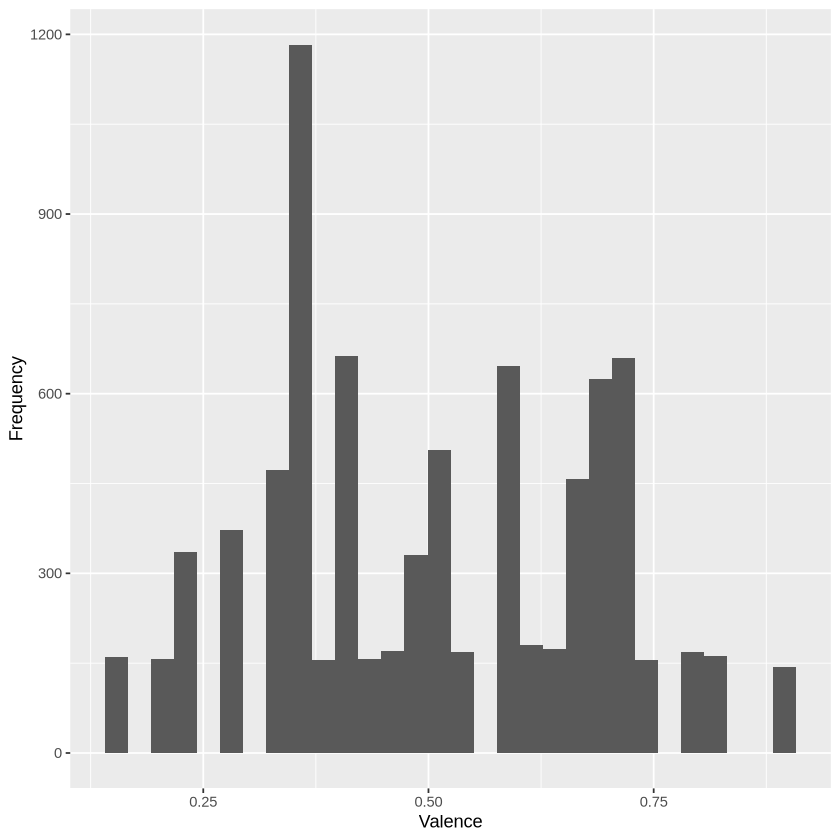

In [18]:
valence_plot <- spotify_train |>
    ggplot(aes(x = valence)) +
      geom_histogram() +
      xlab("Valence") +
      ylab("Frequency") 

valence_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 7 rows containing non-finite values (`stat_bin()`).”


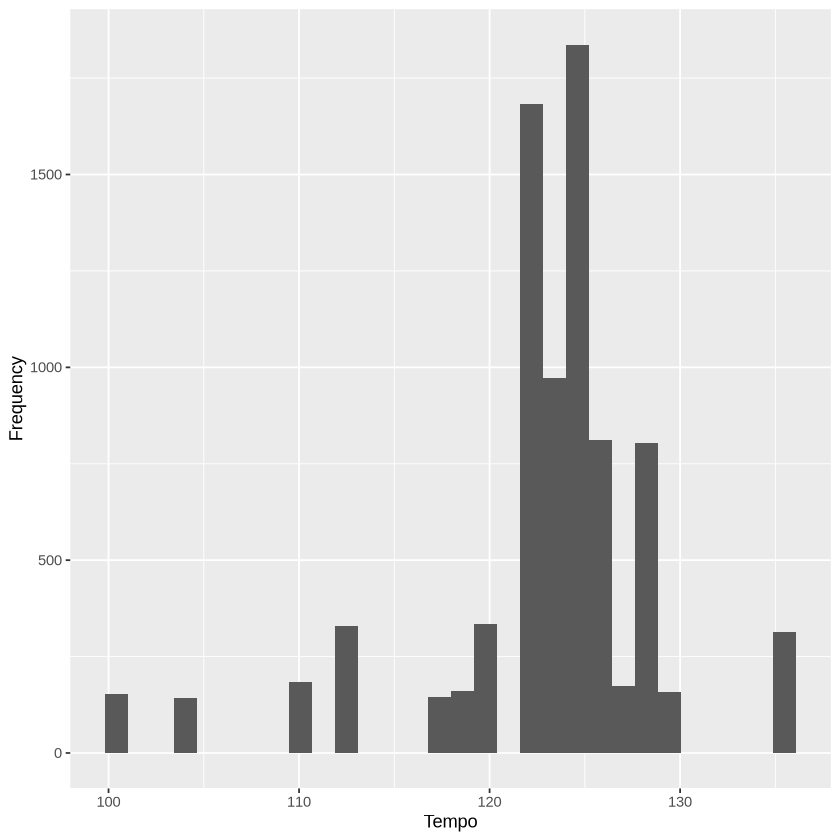

In [19]:
tempo_plot <- spotify_train |>
    ggplot(aes(x = tempo)) +
      geom_histogram() +
      xlab("Tempo") +
      ylab("Frequency") 

tempo_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 7 rows containing non-finite values (`stat_bin()`).”


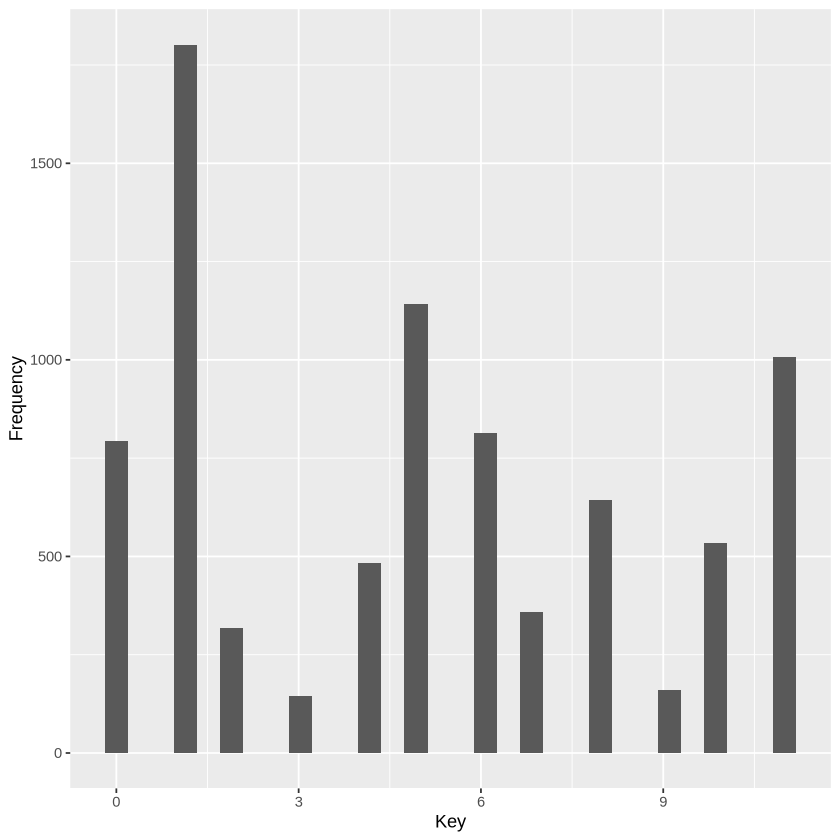

In [20]:
key_plot <- spotify_train |>
    ggplot(aes(x = key)) +
      geom_histogram() +
      xlab("Key") +
      ylab("Frequency") 

key_plot